In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import os

In [2]:
caminho_arquivo_csv = os.path.join(os.path.dirname('03 - Projeto'), '..', '..', 'datasets')
df_f = pd.read_csv( os.path.join(caminho_arquivo_csv, 'oscars.csv'))
df_a = pd.read_csv(os.path.join(caminho_arquivo_csv,'idade_etnia.csv'))

In [3]:
df_f.head(5)

year_ceremony                 category           name                film  \
0           2001  actor in a leading role  javier bardem  before night falls   
1           2001  actor in a leading role  russell crowe           gladiator   
2           2001  actor in a leading role      tom hanks           cast away   
3           2001  actor in a leading role      ed harris             pollock   
4           2001  actor in a leading role  geoffrey rush              quills   

   winner  
0   False  
1    True  
2   False  
3   False  
4   False

In [4]:
df_f.drop_duplicates(inplace=True)

In [5]:
df_a.head(5)

ACTOR_RACE primaryName  birthYear Gender
0        NaN   070 shake     1997.0    NaN
1        NaN  1 shot mac     1988.0    NaN
2        NaN    14 shots     2002.0    NaN
3        NaN     18 veno     2001.0    NaN
4        NaN     18leakg     2000.0    NaN

In [6]:
df_f.groupby('category').count()

year_ceremony  name  film  \
category                                                                        
actor in a leading role                                       120   120   120   
actor in a supporting role                                    120   120   120   
actress in a leading role                                     120   120   120   
actress in a supporting role                                  120   120   120   
animated feature film                                          99    99    99   
art direction                                                  60    60    60   
award of commendation                                           1     1     1   
best picture                                                  181   181   181   
cinematography                                                120   120   120   
costume design                                                120   120   120   
directing                                                     120   120   120   
documentary feature                                           110   110   110   
documentary feature film                                       10    10    10   
documentary short film                                         10    10    10   
documentary short subject                                     101   101   101   
film editing                                                  120   120   120   
foreign language film                                          95    95    95   
international feature film                                     25    25    25   
makeup                                                         35    35    35   
makeup and hairstyling                                         46    46    46   
music original score                                          120   120   120   
music original song                                           109   109   109   
production design                                              60    60    60   
short film animated                                           118   118   118   
short film live action                                        120   120   120   
sound                                                          35    35    35   
sound editing                                                  86    86    86   
sound mixing                                                   85    85    85   
visual effects                                                100   100   100   
writing adapted screenplay                                    110   110   110   
writing original screenplay                                   110   110   110   
writing screenplay based on material previously...             10    10    10   
writing screenplay written directly for the screen             10    10    10   

                                                    winner  
category                                                    
actor in a leading role                                120  
actor in a supporting role                             120  
actress in a leading role                              120  
actress in a supporting role                           120  
animated feature film                                   99  
art direction                                           60  
award of commendation                                    1  
best picture                                           181  
cinematography                                         120  
costume design                                         120  
directing                                              120  
documentary feature                                    110  
documentary feature film                                10  
documentary short film                                  10  
documentary short subject                              101  
film editing                                           120  
foreign language film                                   95  
international feature film                              2

In [7]:
cat_atores = df_f[df_f['category'].isin(['actor in a leading role','actor in a supporting role',
                                         'actress in a leading role','actress in a supporting role'])].reset_index(drop=True)
cat_atores = cat_atores[['name','category','winner','year_ceremony']]
cat_atores

name                      category  winner  year_ceremony
0          javier bardem       actor in a leading role   False           2001
1          russell crowe       actor in a leading role    True           2001
2              tom hanks       actor in a leading role   False           2001
3              ed harris       actor in a leading role   False           2001
4          geoffrey rush       actor in a leading role   False           2001
..                   ...                           ...     ...            ...
475          emily blunt  actress in a supporting role   False           2024
476      danielle brooks  actress in a supporting role   False           2024
477      america ferrera  actress in a supporting role   False           2024
478         jodie foster  actress in a supporting role   False           2024
479  davine joy randolph  actress in a supporting role    True           2024

[480 rows x 4 columns]

In [8]:
df_a.sort_values(by='primaryName')

ACTOR_RACE primaryName  birthYear Gender
0             NaN   070 shake     1997.0    NaN
1             NaN  1 shot mac     1988.0    NaN
2             NaN    14 shots     2002.0    NaN
3             NaN     18 veno     2001.0    NaN
4             NaN     18leakg     2000.0    NaN
...           ...         ...        ...    ...
501448      white         NaN        NaN      m
506598      white         NaN        NaN      m
506845      black         NaN        NaN      m
516322      white         NaN        NaN      m
519155      white         NaN        NaN      f

[519464 rows x 4 columns]

In [9]:
atores_oscar = pd.merge(cat_atores,df_a,left_on='name',right_on='primaryName',how='left')
atores_oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           480 non-null    object 
 1   category       480 non-null    object 
 2   winner         480 non-null    bool   
 3   year_ceremony  480 non-null    int64  
 4   ACTOR_RACE     372 non-null    object 
 5   primaryName    476 non-null    object 
 6   birthYear      476 non-null    float64
 7   Gender         471 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 26.8+ KB


In [10]:
atores_oscar['year_ceremony'] = atores_oscar['year_ceremony'].astype('Int64')
atores_oscar['birthYear'] = atores_oscar['birthYear'].astype('Int64')
atores_oscar['idade'] = atores_oscar['year_ceremony'] - atores_oscar['birthYear']

In [11]:
def set_etnia(row):
    if 'white' == row['ACTOR_RACE']:
        return 'white'
    elif pd.isna(row['ACTOR_RACE']):
        return None
    else:
        return 'non_white'

In [12]:
def set_genero(row):
    if 'actress' in row['category']:
        return 'feminino'
    elif 'actor' in row['category']:
        return 'masculino'

In [13]:
atores_oscar['genero'] = atores_oscar.apply(set_genero,axis=1)
atores_oscar['etnia'] = atores_oscar.apply(set_etnia,axis=1)
atores_oscar

name                      category  winner  year_ceremony  \
0          javier bardem       actor in a leading role   False           2001   
1          russell crowe       actor in a leading role    True           2001   
2              tom hanks       actor in a leading role   False           2001   
3              ed harris       actor in a leading role   False           2001   
4          geoffrey rush       actor in a leading role   False           2001   
..                   ...                           ...     ...            ...   
475          emily blunt  actress in a supporting role   False           2024   
476      danielle brooks  actress in a supporting role   False           2024   
477      america ferrera  actress in a supporting role   False           2024   
478         jodie foster  actress in a supporting role   False           2024   
479  davine joy randolph  actress in a supporting role    True           2024   

    ACTOR_RACE          primaryName  birthYear Gender  idade     genero  etnia  
0          NaN        javier bardem       1969      m     32  masculino   None  
1        white        russell crowe       1964      m     37  masculino  white  
2        white            tom hanks       1956      m     45  masculino  white  
3        white            ed harris       1950      m     51  masculino  white  
4        white        geoffrey rush       1951      m     50  masculino  white  
..         ...                  ...        ...    ...    ...        ...    ...  
475      white          emily blunt       1983      f     41   feminino  white  
476        NaN      danielle brooks       1989      f     35   feminino   None  
477        NaN      america ferrera       1984      f     40   feminino   None  
478      white         jodie foster       1962      f     62   feminino  white  
479        NaN  davine joy randolph       1986      f     38   feminino   None  

[480 rows x 11 columns]

# Analises

In [14]:
cores_mulheres = {True: '#B6244F', False: '#7D1128'}
cores_homens = {True: '#2B2D42', False:'#187795'}
cores = {'masculino': '#2B2D42', 'feminino': '#B6244F'}
# cores = {'masculino' : {True: '#2B2D42', False:'#187795'}, 'feminino' : {True: '#B6244F', False: '#7D1128'}}

## **Media Idades**

### Visualização

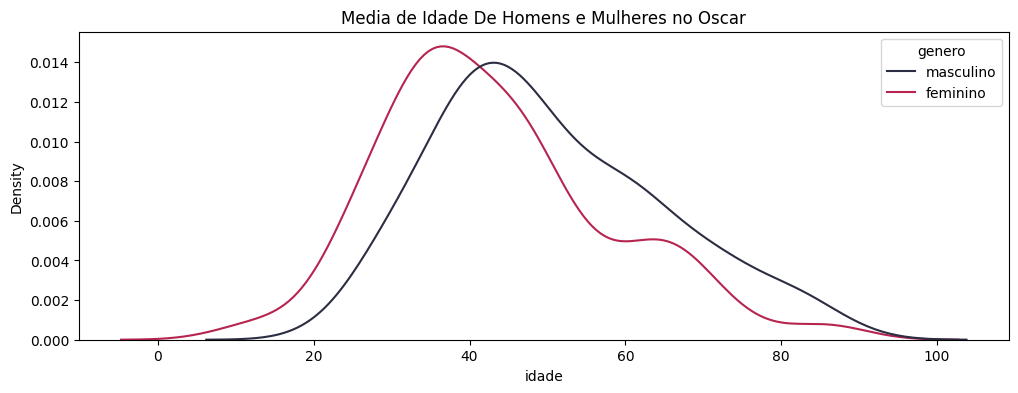

In [31]:
group = atores_oscar.groupby(['genero'])['idade'].mean().reset_index(name='media')
plt.figure(figsize=(12,4))
sns.kdeplot(data=atores_oscar, x='idade', hue='genero', palette=cores)
plt.title('Media de Idade De Homens e Mulheres no Oscar')
plt.show()

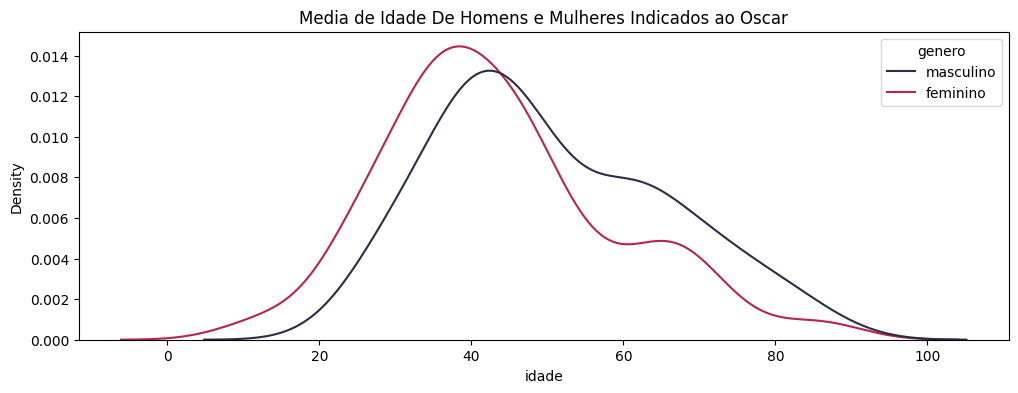

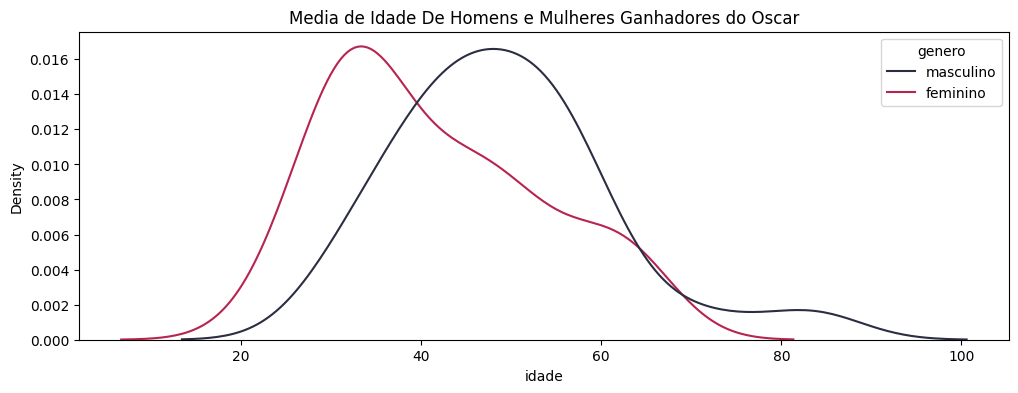

In [37]:
for w in atores_oscar['winner'].unique():
    titulo = 'Ganhadores do' if w == True else 'Indicados ao'
    df = atores_oscar[atores_oscar['winner']==w]
    group = df.groupby(['genero'])['idade'].mean().reset_index(name='media')
    plt.figure(figsize=(12,4))
    sns.kdeplot(data=df, x='idade', hue='genero', palette=cores)
    plt.title(f'Media de Idade De Homens e Mulheres {titulo} Oscar')
    plt.show()

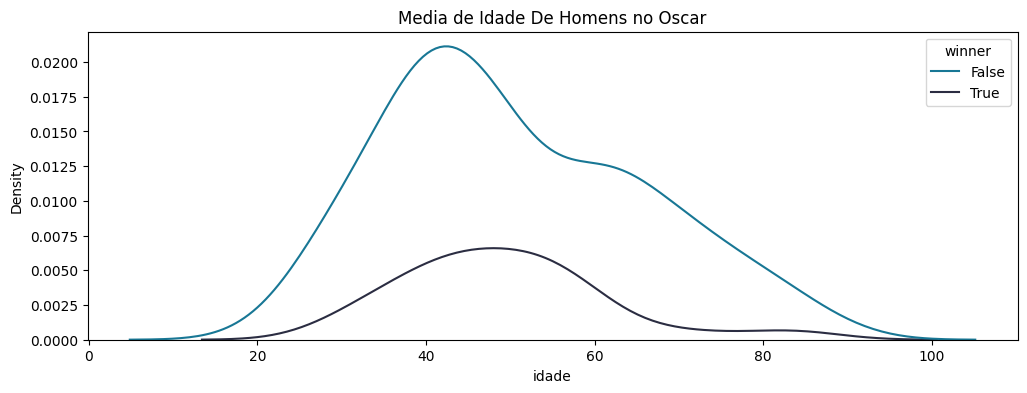

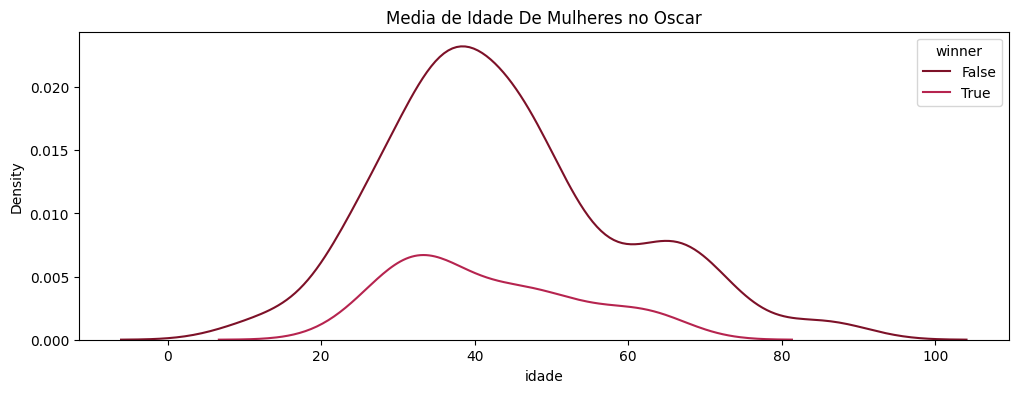

In [17]:
for g in atores_oscar['genero'].unique():
    titulo = 'Mulheres' if g == 'feminino' else 'Homens'
    df = atores_oscar[atores_oscar['genero']==g]
    group = df.groupby(['winner'])['idade'].mean().reset_index(name='media')
    plt.figure(figsize=(12,4))
    sns.kdeplot(data=df, x='idade', hue='winner',palette=(cores_mulheres if g == 'feminino' else cores_homens))
    plt.title(f'Media de Idade De {titulo} no Oscar')
    plt.show()

## **Analises Temporais**

### Média das Idades por Gênero

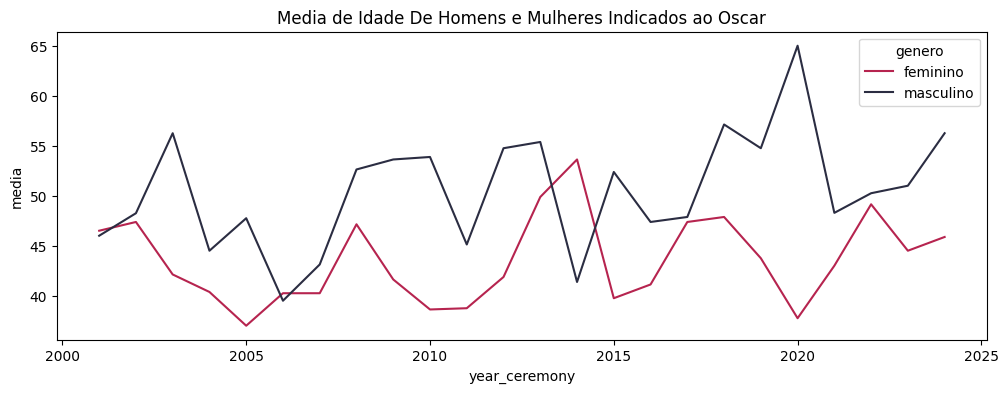

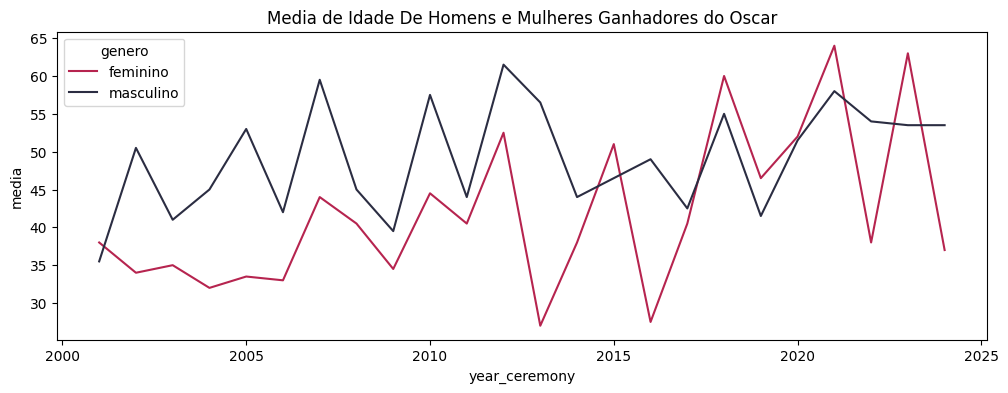

In [18]:
for w in atores_oscar['winner'].unique():
    titulo = 'Ganhadores do' if w == True else 'Indicados ao'
    df = atores_oscar[atores_oscar['winner']==w]
    group = df.groupby(['genero','year_ceremony'])['idade'].mean().reset_index(name='media')
    plt.figure(figsize=(12,4))
    sns.lineplot(data=group, x='year_ceremony',y='media',hue='genero',palette=cores)
    plt.title(f'Media de Idade De Homens e Mulheres {titulo} Oscar')
    plt.show()

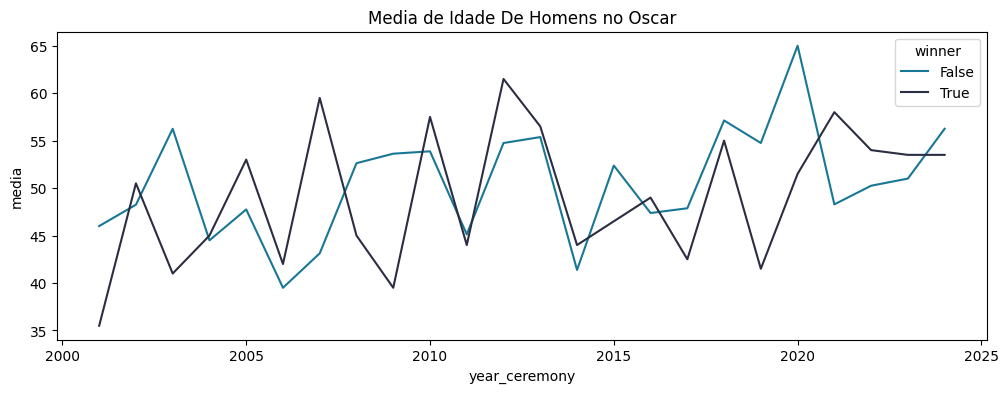

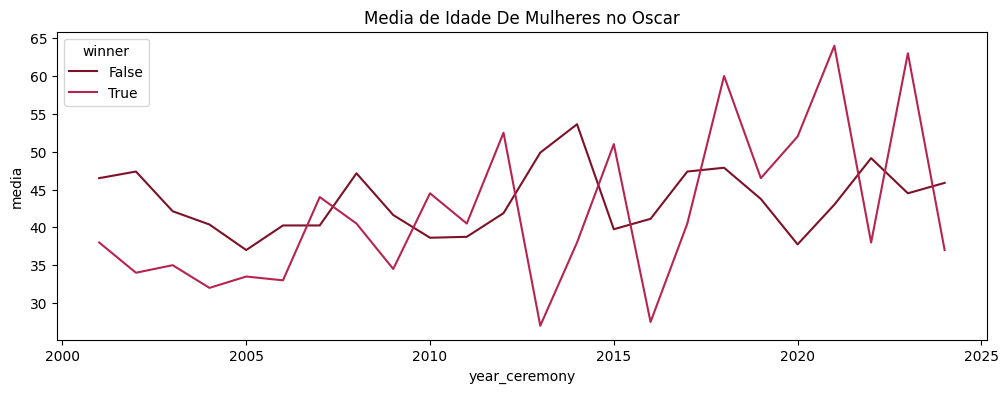

In [19]:
for g in atores_oscar['genero'].unique():
    titulo = 'Mulheres' if g == 'feminino' else 'Homens'
    df = atores_oscar[atores_oscar['genero']==g]
    group = df.groupby(['winner','year_ceremony'])['idade'].mean().reset_index(name='media')
    plt.figure(figsize=(12,4))
    sns.lineplot(data=group, x='year_ceremony',y='media',hue='winner',palette=(cores_mulheres if g == 'feminino' else cores_homens))
    plt.title(f'Media de Idade De {titulo} no Oscar')
    plt.show()

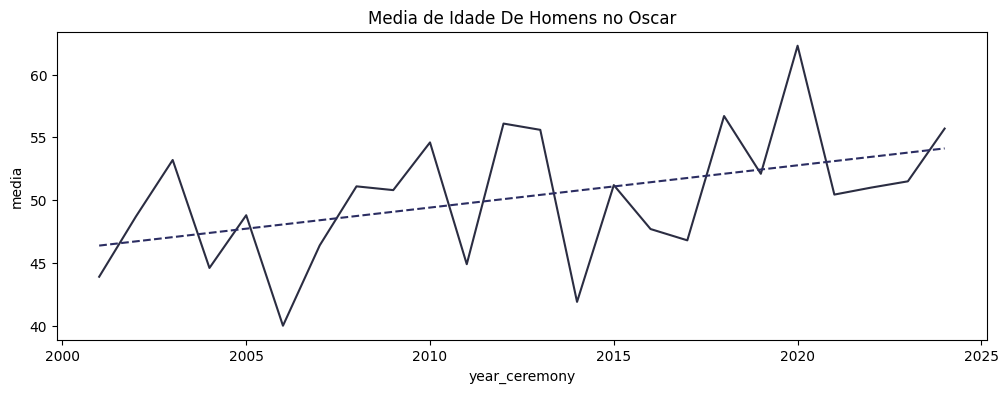

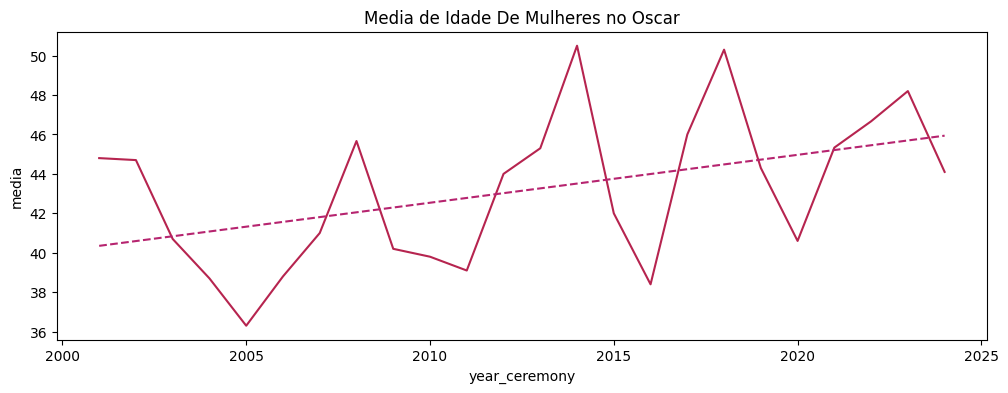

In [20]:
for g in atores_oscar['genero'].unique():
    titulo = 'Mulheres' if g == 'feminino' else 'Homens'
    df = atores_oscar[atores_oscar['genero']==g]
    group = df.groupby(['year_ceremony'])['idade'].mean().reset_index(name='media')
    
    plt.figure(figsize=(12,4))
    sns.lineplot(data=group, x='year_ceremony',y='media',color=('#B6244F' if g == 'feminino' else '#2B2D42'))
    
    z = np.polyfit(group['year_ceremony'], group['media'], 1)
    p = np.poly1d(z)
    plt.plot(group['year_ceremony'], p(group['year_ceremony']), linestyle='--', color=('#B6246F' if g == 'feminino' else '#2B2D62'))
        
    plt.title(f'Media de Idade De {titulo} no Oscar')
    plt.show()

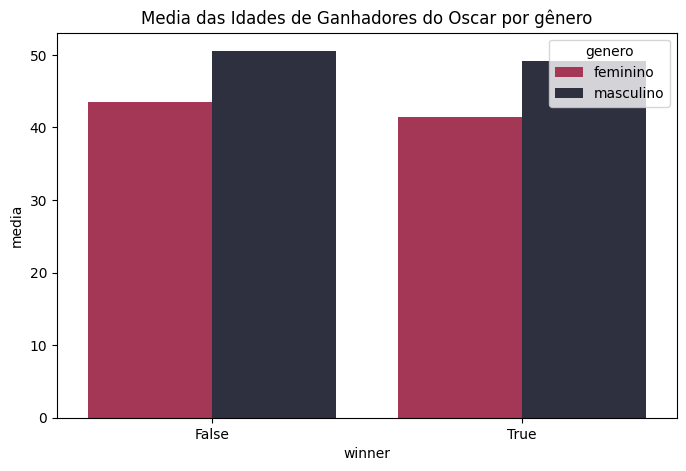

In [21]:
group = atores_oscar.groupby(['genero','winner'])['idade'].mean().reset_index(name='media')
plt.figure(figsize=(8,5))
sns.barplot(data=group,x='winner',y='media',hue='genero',palette=cores)
plt.title('Media das Idades de Ganhadores do Oscar por gênero')
plt.show()

### Quantidade de Atores por Etnia

Com dados de apenas 378 dos 480 atores

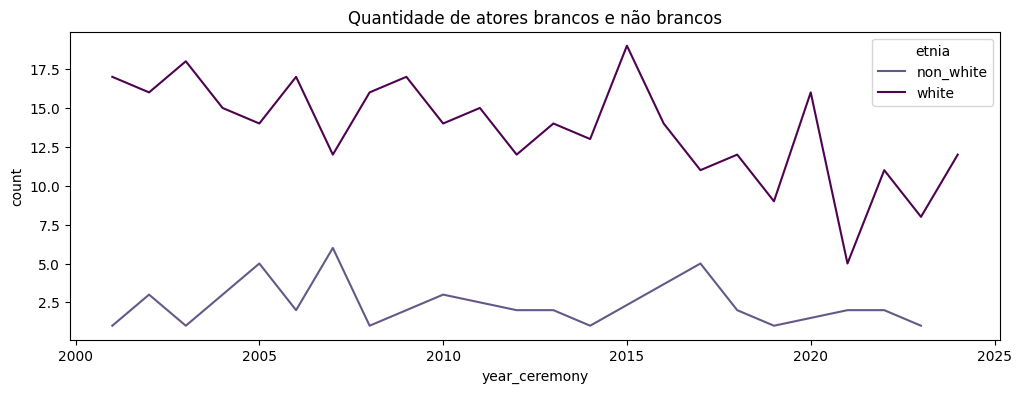

In [22]:
group_e = atores_oscar.groupby(['year_ceremony','etnia'])['primaryName'].count().reset_index(name='count')
plt.figure(figsize=(12,4))
sns.lineplot(data=group_e, x='year_ceremony',y='count',hue='etnia',palette=('#645986','#4E0250'))
plt.title('Quantidade de atores brancos e não brancos')
plt.show()

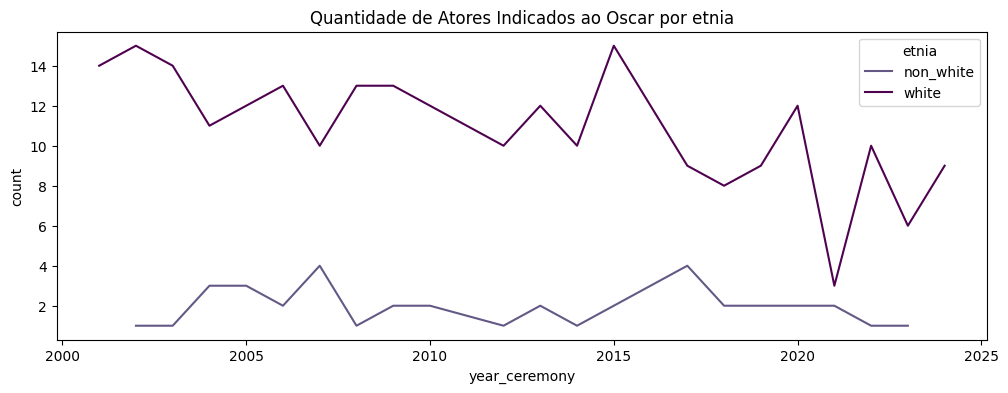

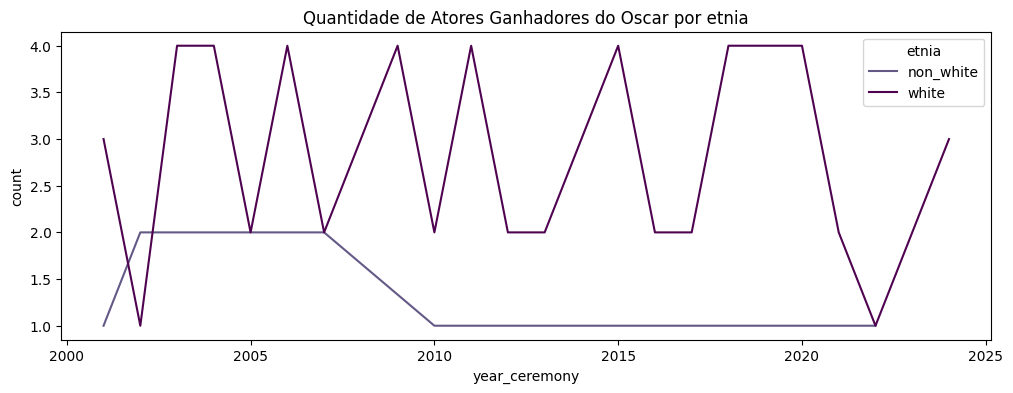

In [23]:
for w in atores_oscar['winner'].unique():
    titulo = 'Ganhadores do' if w == True else 'Indicados ao'
    df = atores_oscar[atores_oscar['winner']==w]
    group_e = df.groupby(['etnia','year_ceremony'])['primaryName'].count().reset_index(name='count')
    plt.figure(figsize=(12,4))
    sns.lineplot(data=group_e, x='year_ceremony',y='count',hue='etnia',palette=('#645986','#4E0250'))
    plt.title(f'Quantidade de Atores {titulo} Oscar por etnia')
    plt.show()

In [24]:
grouped = atores_oscar.groupby(['winner','etnia','year_ceremony'])['primaryName'].count().reset_index(name='count')

In [25]:
filtrado = atores_oscar.dropna(subset=['etnia'])
filtrado['non_white'] = filtrado['etnia'].apply(lambda x: x != 'white')

C:\Users\yasmi\AppData\Local\Temp\ipykernel_22832\1296052431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['non_white'] = filtrado['etnia'].apply(lambda x: x != 'white')


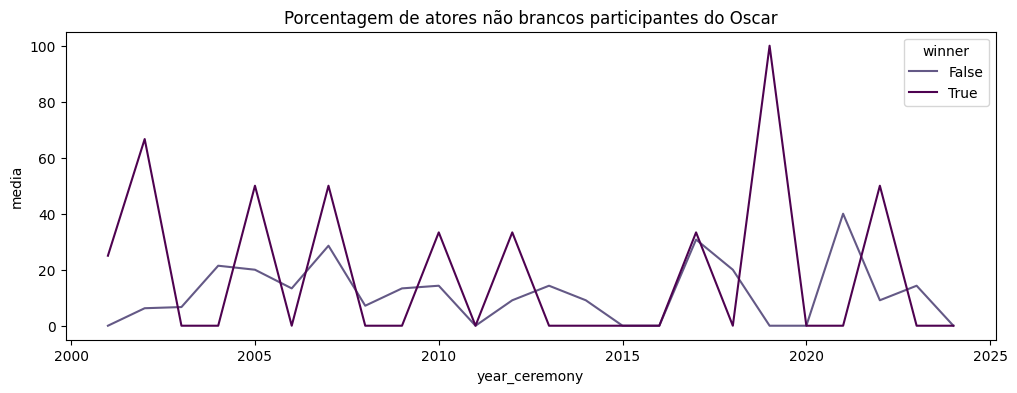

In [26]:
filtrado_g = filtrado.groupby(['year_ceremony','winner'])['non_white'].mean().reset_index(name='media')
filtrado_g['media'] = filtrado_g['media']*100

plt.figure(figsize=(12,4))
sns.lineplot(data=filtrado_g, x='year_ceremony',y='media',hue='winner',palette=('#645986','#4E0250'))
plt.title(f'Porcentagem de atores não brancos participantes do Oscar')
plt.show()

## **Comparando Médias das Idades**

### Por Genero

Intervalo de confiança das médias

In [27]:
media_idades = atores_oscar.groupby('year_ceremony')['idade'].mean().mean() # media das médias por ano

intervalo = sms.DescrStatsW(atores_oscar.groupby(['year_ceremony'])['idade'].mean()).tconfint_mean()
print(f' Media: {media_idades} \n Intervalo: {intervalo}')

 Media: 46.70885721247563 
 Intervalo: (45.250473881534404, 48.16724054341687)


Como a diferença entre as médias não pode ser 0, podemos afirmar que a média das idades dos homens é mais alta que a das mulheres

In [28]:
df_my = atores_oscar.groupby(['year_ceremony','genero'])['idade'].mean().reset_index()
df_f = df_my[df_my['genero']=='feminino']
df_m = df_my[df_my['genero']=='masculino']

comp = sms.CompareMeans(sms.DescrStatsW(df_f['idade']), sms.DescrStatsW(df_m['idade'])) # diferença entre os intervalos
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Como a diferença pode ser 0 e o valor de P é alto, não podemos afirmar que a média da idade entre os indicados e premiados é diferente

In [29]:
for g in atores_oscar['genero'].unique():    
    df_p = atores_oscar[atores_oscar['genero']==g].groupby(['year_ceremony','winner'])['idade'].mean().reset_index()
    df_w = df_p[df_p['winner']==True]
    df_i = df_p[df_p['winner']==False]

    comp = sms.CompareMeans(sms.DescrStatsW(df_w['idade']), sms.DescrStatsW(df_i['idade'])) # diferença entre os intervalos
    print(f'\n  Genero {g} \n')
    print(f'\n {comp.summary()} \n')
    # comp.summary()


  Genero masculino 


                           Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -1.3713      1.885     -0.727      0.471      -5.166       2.423


  Genero feminino 


                           Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -1.6265      2.309     -0.705      0.485      -6.273       3.020



## Por Vencedor

In [30]:
df_p = atores_oscar.groupby(['year_ceremony','winner'])['idade'].mean().reset_index()
df_w = df_p[df_p['winner']==True]
df_i = df_p[df_p['winner']==False]

comp = sms.CompareMeans(sms.DescrStatsW(df_w['idade']), sms.DescrStatsW(df_i['idade']))
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>